In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Stage1:Data Preparation and Data Cleaning


In [153]:
dataset = pd.read_csv("../data_raw/Frailty_Data.csv")
dataset.dropna(inplace=True)

In [154]:
dataset['Height'] = dataset['Height'].astype(float)
dataset['Weight'] = dataset['Weight'].astype(float)
dataset['Age'] = dataset['Age'].astype(int)
dataset['GripStrength'] = dataset['GripStrength'].astype(float)
dataset

,Height,Weight,Age,GripStrength,Frailty
0,65.8,112.0,30,30.0,N
1,71.5,136.0,19,31.0,N
2,69.4,153.0,45,29.0,N
3,68.2,142.0,22,28.0,Y
4,67.8,144.0,29,24.0,Y
5,68.7,123.0,50,26.0,N
6,69.8,141.0,51,22.0,Y
7,70.1,136.0,23,20.0,Y
8,67.9,112.0,17,19.0,N
9,66.8,120.0,39,31.0,N


In [155]:
dataset# Save the cleaned dataset
dataset = dataset.to_csv("../data_clean/Frailty_Data_clean.csv", index=False)
dataset = pd.read_csv("../data_clean/Frailty_Data_clean.csv")
print(dataset)

   Height  Weight  Age  GripStrength Frailty 
0    65.8   112.0   30          30.0       N 
1    71.5   136.0   19          31.0       N 
2    69.4   153.0   45          29.0       N 
3    68.2   142.0   22          28.0       Y 
4    67.8   144.0   29          24.0       Y 
5    68.7   123.0   50          26.0       N 
6    69.8   141.0   51          22.0       Y 
7    70.1   136.0   23          20.0       Y 
8    67.9   112.0   17          19.0       N 
9    66.8   120.0   39          31.0       N 


### Stage 2: Exploratory Data Analysis (EDA)

#### Visualizations

#### Scatter plot

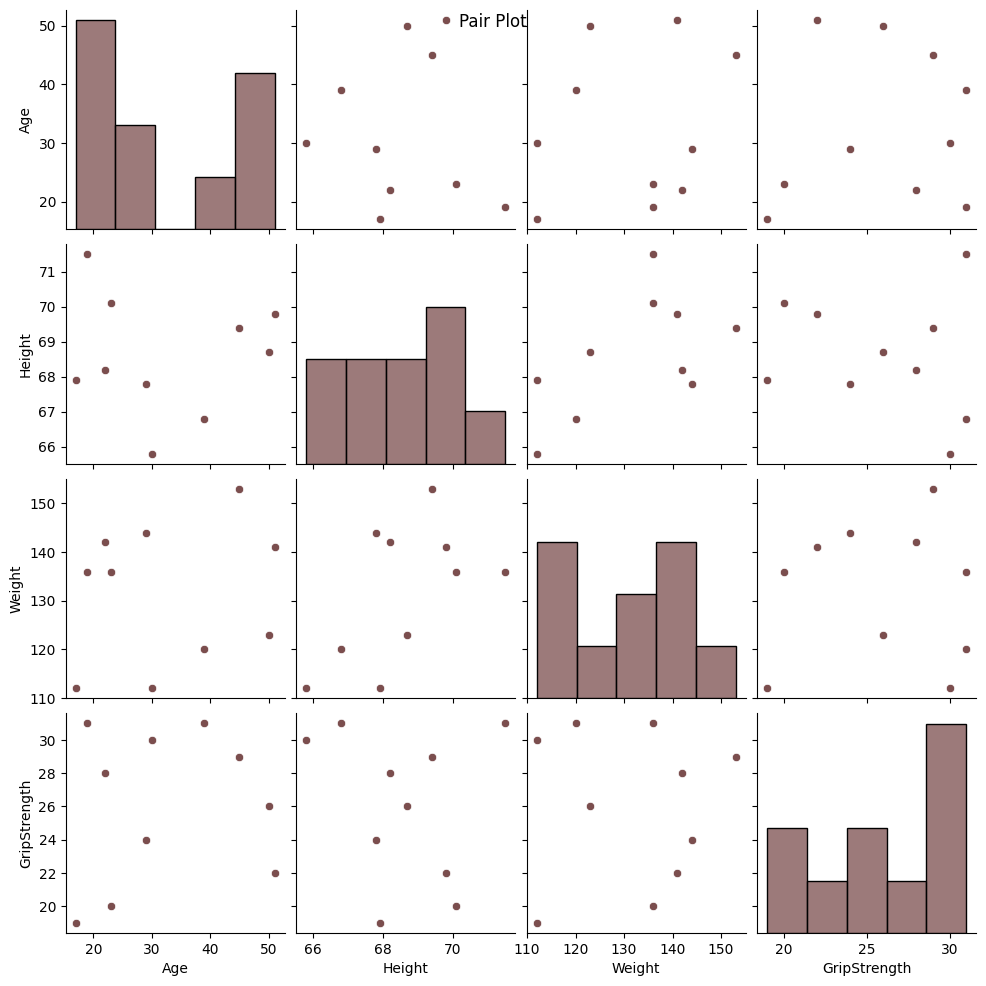

In [156]:
sns.set_palette("pink")
sns.pairplot(dataset[['Age', 'Height', 'Weight', 'GripStrength']])
plt.suptitle('Pair Plot')
plt.savefig('../results/scatterplot_pair_plot.png')
plt.show()

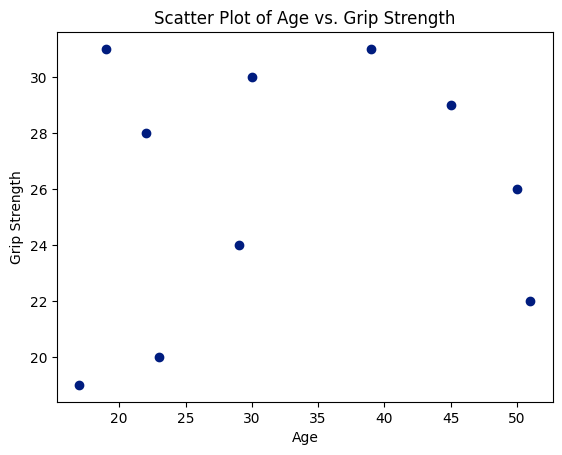

In [157]:
sns.set_palette("dark")
plt.scatter(dataset['Age'], dataset['GripStrength'])
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.title('Scatter Plot of Age vs. Grip Strength')
plt.savefig('../results/scatterplot_of_age_vs_gripstrength.png')
plt.show()

#### Violin Plot

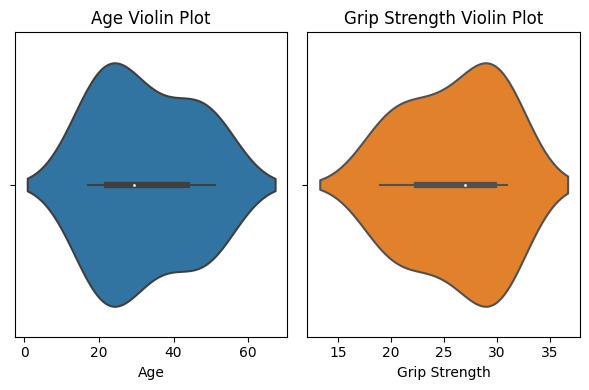

In [158]:
palette_age = ["#1f77b4"]  
palette_grip_strength = ["#ff7f0e"]  
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.violinplot(x=dataset['Age'],  palette=palette_age)
plt.xlabel('Age')
plt.title('Age Violin Plot')

plt.subplot(1, 2, 2)
sns.violinplot(x=dataset['GripStrength'], palette=palette_grip_strength)
plt.xlabel('Grip Strength')
plt.title('Grip Strength Violin Plot')
plt.savefig('../results/violinplot_of_age_and_gripstrength.png')

plt.tight_layout()
plt.show()


#### Histogram

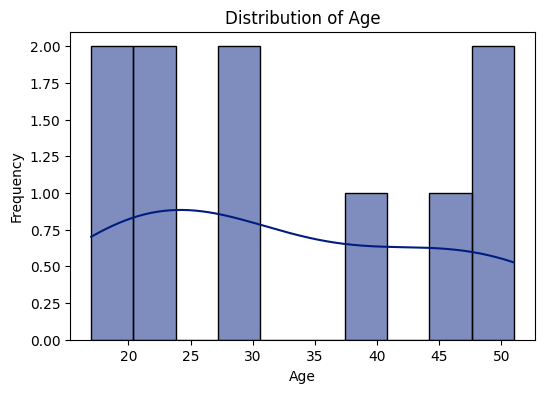

In [159]:
sns.set_palette("dark")
plt.figure(figsize=(6, 4))
sns.histplot(dataset['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('../results/histogram_distribution_of_age.png')
plt.show()

#### Correlation Matrix

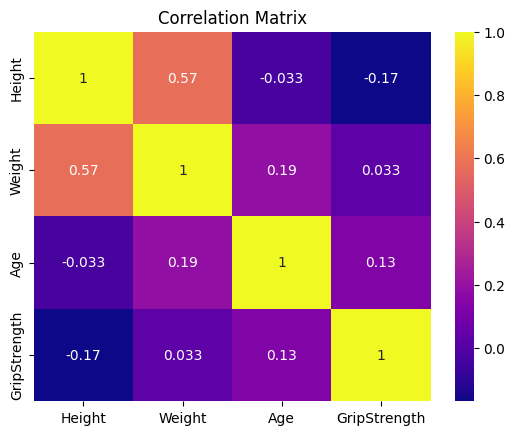

In [160]:
numeric_columns = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.savefig('../results/correlation_matrix.png')
plt.show()

### Stage 3:Modeling and Analysis

#### K-means Clustering

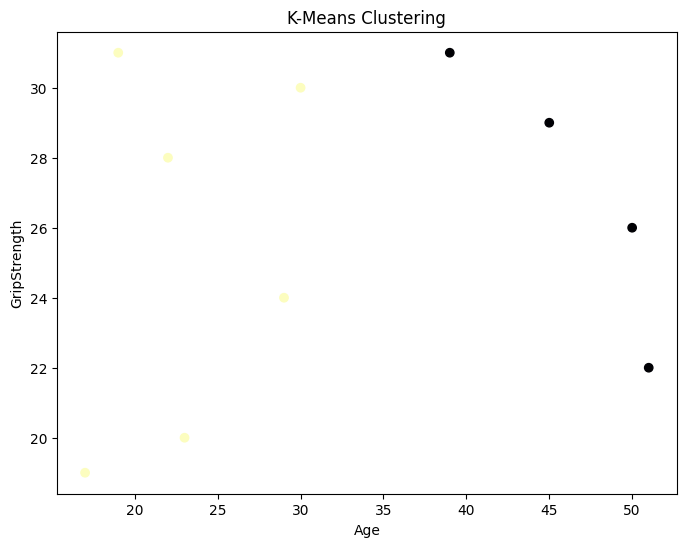

In [161]:
X = dataset[['Age', 'GripStrength']]
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(X)
cluster_labels = kmeans.labels_
dataset['Cluster'] = cluster_labels
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Age'], dataset['GripStrength'], c=cluster_labels, cmap='magma')
plt.xlabel('Age')
plt.ylabel('GripStrength')
plt.title('K-Means Clustering')
plt.savefig('../results/k_means_clustering.png')
plt.show()